<a href="https://colab.research.google.com/github/SHINDongHyeo/GAN_practice/blob/main/gan_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive

In [ ]:
# from google.colab import files

# files.upload()

In [ ]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = "/content/drive/MyDrive/"

In [ ]:
# !kaggle datasets download -d jessicali9530/celeba-dataset

In [ ]:
# !unzip -q celeba-dataset.zip -d .

In [ ]:
img_name = 1
numberImage = Image.open("/content/drive/MyDrive/img_align_celeba/img_align_celeba/{0:06d}.jpg".format(img_name)).crop((20,30,160,180)).resize((64,64))
numberImage

NameError: ignored

100%|██████████| 10000/10000 [00:24<00:00, 406.85it/s]


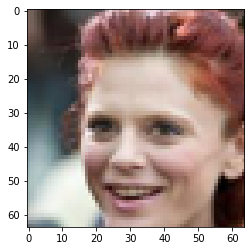

(10000, 64, 64, 3)

In [ ]:
from PIL import Image
import os
import numpy as np
from tqdm import tqdm

img_name = 1
images=[]

for i in tqdm(range(10000)):
  numberImage = Image.open("/content/drive/MyDrive/img_align_celeba/img_align_celeba/{0:06d}.jpg".format(img_name)).crop((20,30,160,180)).resize((64,64))
  img_name+=1
  images.append(np.array(numberImage))

import matplotlib.pyplot as plt
plt.imshow(images[1])
plt.show()

images=np.array(images)
images.shape

In [ ]:
images = np.divide(images, 255)
images = images.reshape(10000,64,64,3)
print(images.shape)

(10000, 64, 64, 3)


In [ ]:
import tensorflow as tf


In [ ]:
discriminator = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), strides=(2,2), padding="same", input_shape=[64,64,3]),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(64, (3,3), strides=(2,2), padding="same"),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
discriminator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 64)        0         
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 flatten (Flatten)           (None, 16384)             0

In [ ]:
generator = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4*4*256, input_shape=(100,)),
    tf.keras.layers.Reshape((4,4,256)),
    tf.keras.layers.Conv2DTranspose(256, 3, strides=2, padding="same"),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2DTranspose(128, 3, strides=2, padding="same"),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2DTranspose(64, 3, strides=2, padding="same"),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2DTranspose(3, 3, strides=2, padding="same", activation="sigmoid")
])
generator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 4096)              413696    
                                                                 
 reshape (Reshape)           (None, 4, 4, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 8, 8, 256)        590080    
 nspose)                                                         
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 8, 8, 256)         0         
                                                                 
 batch_normalization (BatchN  (None, 8, 8, 256)        1024      
 ormalization)                                                   
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 16, 16, 128)     

In [ ]:
GAN = tf.keras.models.Sequential([generator, discriminator])

discriminator.compile(optimizer = "adam", loss = "binary_crossentropy")

discriminator.trainable = False
GAN.compile(optimizer="adam", loss="binary_crossentropy")

In [ ]:
Xdata = images

for j in range(100):
    print("epoch : ", j)
    # predict_pic()
    for i in range(10000//128):
        if i % 100 ==0:
            print("batch : ", i)
        realImages = Xdata[i * 128: (i+1)*128]
        RealY = np.ones(shape=(128,1))

        randomNum = np.random.uniform(-1, 1, size=(128,100))
        noImages = generator.predict(randomNum)
        plt.imshow(noImages[i,:,:])
        plt.show()
        NoY = np.zeros(shape=(128,1))

        loss1 = discriminator.train_on_batch(realImages, RealY)
        loss2 = discriminator.train_on_batch(noImages, NoY)

        RealY = np.ones(shape=(128,1))
        randomNum = np.random.uniform(-1,1, size=(128,100))
        loss3 = GAN.train_on_batch(randomNum, RealY)

    print("loss", (loss1+loss2),loss3)